### Named Entity recognition



In [10]:
import spacy
from spacy import displacy
sp = spacy.load("en_core_web_sm")


def ner(txt_path):
  with open( txt_path, 'r') as file:
      text = file.read().replace('\n', '')
  results = []
  for word in sp(text).ents:
      results.append((word.text,word.label_ ))
  displacy.render(sp(str(text)), jupyter=True, style='ent')
  return results

In [11]:

txt_path = '/content/test_text.txt'
ner(txt_path)

[('44th', 'ORDINAL'),
 ('the United States', 'GPE'),
 ('first', 'ORDINAL'),
 ('African American', 'NORP'),
 ('two', 'CARDINAL'),
 ('2008', 'DATE'),
 ('2012.The', 'PRODUCT'),
 ('Kenya', 'GPE'),
 ('Kansas', 'GPE'),
 ('Obama', 'GPE'),
 ('Hawaii', 'GPE'),
 ('Columbia University', 'ORG'),
 ('Harvard Law School', 'ORG'),
 ('the Harvard Law Review', 'ORG'),
 ('the Illinois State Senate', 'ORG'),
 ('U.S.', 'GPE'),
 ('Illinois', 'GPE'),
 ('Michelle Obama', 'PERSON'),
 ('two', 'CARDINAL'),
 ('Malia', 'GPE'),
 ('Sasha', 'ORG')]

## Face Detection

In [2]:
!pip install opencv-python

In [4]:
#!pip install opencv-python
import cv2
import os
model_path = '/content/haarcascade_frontalface_default.xml'
image_path = '/content/test_image.png'

def process_photo(image_path , model_path):
  img = cv2.imread(image_path)
  face_cascade = cv2.CascadeClassifier(model_path)
  faces = face_cascade.detectMultiScale(img, 1.1, 4)
  # Draw rectangle around the faces
  for (x, y, w, h) in faces: 
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
  # Export the result
  base_dir , _ = os.path.split(image_path)
  output_path= base_dir + '/face_detected.png'
  cv2.imwrite( output_path , img)
  return output_path

out = process_photo(image_path , model_path)


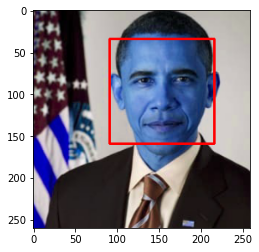

In [8]:
import matplotlib.pyplot as plt
image = cv2.imread(out)
plt.imshow(image)
plt.show()

## Audio 

In [ ]:
!pip install pyAudioAnalysis
!pip install eyed3
!pip install pydub
!pip install hmmlearn

In [ ]:
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import audioSegmentation as aS
def 
  [Fs, x] = aIO.read_audio_file("/content/test_audio.mp3")
  st_step = 0.020
  s = aS.silence_removal(x, Fs, 0.020, st_step, smooth_window = 1.0, weight = 0.3, plot = True)
  time_x = np.arange(0, x.shape[0] / float(Fs), 1.0 /Fs)
  pyplot.plot(time_x, x , color = 'b')
  for s_lim in s:
      pyplot.axvline(x=s_lim[0], color='red')
      pyplot.axvline(x=s_lim[1], color='red')
  pyplot.savefig('signal.jpg')

In [ ]:
import os
import pathlib

In [ ]:
def process_audio(file):
    [Fs, x] = aIO.read_audio_file(file)
    s = aS.silence_removal(x, Fs, 0.020, 0.020, smooth_window = 1.0, weight = 0.3)
    Non_Silence_Chunks = []
    for i in range(len(s)):
        Non_Silence_Chunks.append("Non-Silence Chunk {} start : {} , end : {}".format(i+1 ,s[i][0] , s[i][1]))

    time_x = np.arange(0, x.shape[0] / float(Fs), 1.0 /Fs)
    pyplot.plot(time_x, x , color = 'b')
    for s_lim in s:
        pyplot.axvline(x=s_lim[0], color='red')
        pyplot.axvline(x=s_lim[1], color='red')

    pathlib.Path("photo_results").mkdir(parents=True, exist_ok=True)
    _, file_name = os.path.split(file) 
    path=f'photo_results/{file_name.split(".")[0]}.jpg'
    pyplot.savefig(f'{path}', bbox_inches='tight')

    return  path , Non_Silence_Chunks 

('photo_results/test_audio.jpg',
 ['Non-Silence Chunk 1 start : 0.36 , end : 5.46',
  'Non-Silence Chunk 2 start : 6.6000000000000005 , end : 7.76',
  'Non-Silence Chunk 3 start : 8.46 , end : 11.26',
  'Non-Silence Chunk 4 start : 11.9 , end : 14.36',
  'Non-Silence Chunk 5 start : 15.08 , end : 20.36',
  'Non-Silence Chunk 6 start : 20.94 , end : 25.0',
  'Non-Silence Chunk 7 start : 26.1 , end : 28.22',
  'Non-Silence Chunk 8 start : 29.2 , end : 34.76',
  'Non-Silence Chunk 9 start : 35.24 , end : 38.28',
  'Non-Silence Chunk 10 start : 38.7 , end : 40.82',
  'Non-Silence Chunk 11 start : 42.26 , end : 43.660000000000004',
  'Non-Silence Chunk 12 start : 44.88 , end : 54.76',
  'Non-Silence Chunk 13 start : 55.660000000000004 , end : 60.32'])

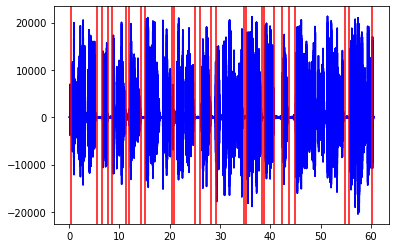

In [ ]:
process_audio("/content/test_audio.mp3")

In [ ]:
!python audioAnalysis.py silenceRemoval -i 'D:\task\audio.wav' --smoothing 1.0 --weight 0.3